# Exploratory Data Analysis

# importing libraries

In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import yellowbrick as ylb
import dython as dy

In [2]:
import warnings
warnings.filterwarnings("ignore")
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.model_selection import train_test_split,cross_val_score,cross_val_predict
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
from sklearn.metrics import mean_squared_error,r2_score
from numpy import log, log1p
from scipy.stats import boxcox
import pylab
from sklearn.linear_model import LinearRegression
from yellowbrick.regressor import residuals_plot
from yellowbrick.regressor import prediction_error
from dython import nominal

In [3]:
dataset = pd.read_excel("D:/RAHUL project/Sami/insurance.xls")
dataset

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
dataset.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [5]:
dataset.shape

(1338, 7)

In [6]:
dataset.describe().T

,count,mean,std,min,25%,50%,75%,max
age,1338.0,39.207025,14.049960,18.0000,27.00000,39.000,51.000000,64.00000
bmi,1338.0,30.663397,6.098187,15.9600,26.29625,30.400,34.693750,53.13000
children,1338.0,1.094918,1.205493,0.0000,0.00000,1.000,2.000000,5.00000
charges,1338.0,13270.422265,12110.011237,1121.8739,4740.28715,9382.033,16639.912515,63770.42801


# checking for Null values

In [7]:
dataset.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000175D7D1CA88>,
      dtype=object)

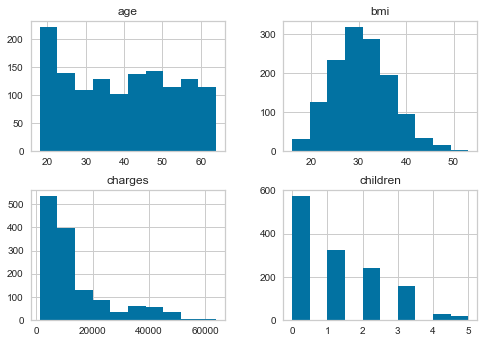

In [8]:
dataset[['age','bmi','charges','children']].hist()

# Correlation plot

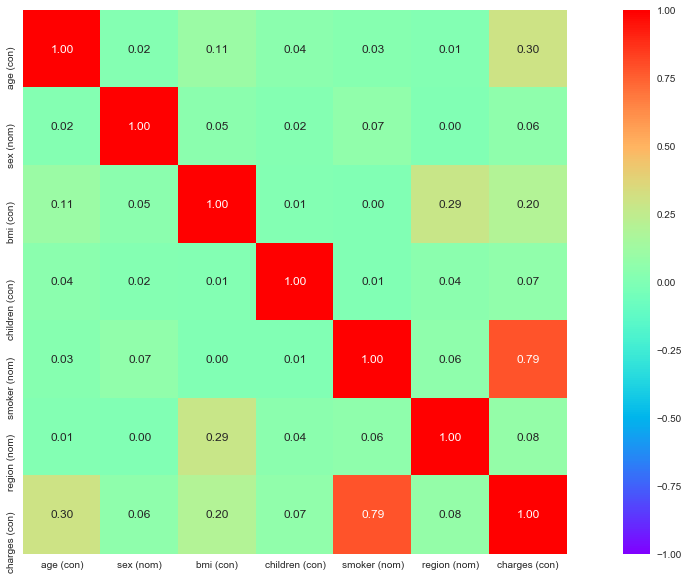

In [9]:
nominal.associations(dataset,figsize=(20,10),mark_columns=True,cmap="rainbow");

# from the above correlation plot we can say that there is high correlation between smoking and charges followed by age and BMI.

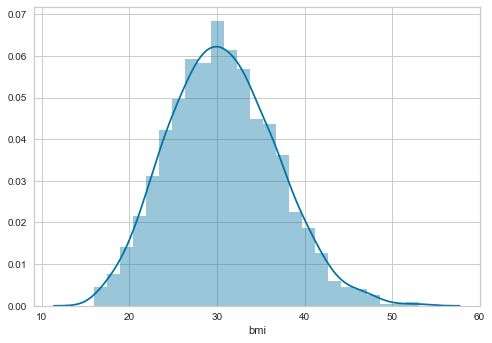

In [10]:
sns.distplot(dataset['bmi'])

# from the above graph we can say that BMI is approximately normally distributed.

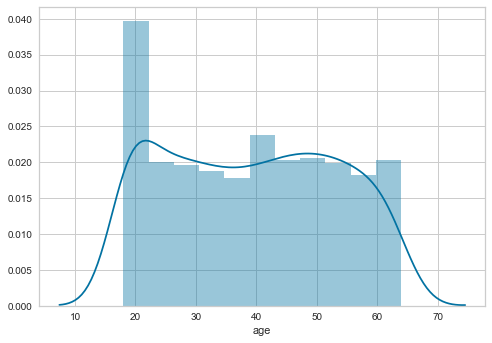

In [11]:
sns.distplot(dataset['age'])

# From the above graph we can say that age is uniformly distributed.

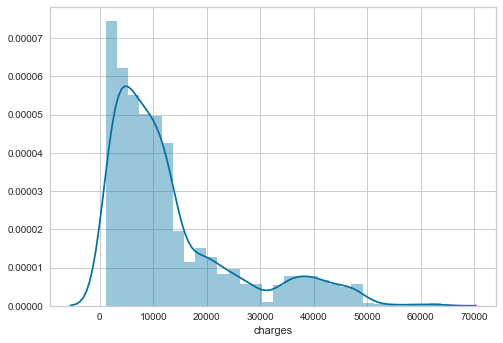

In [12]:
sns.distplot(dataset['charges'])

# This distribution is right-skewed. To make it closer to normal we can apply log

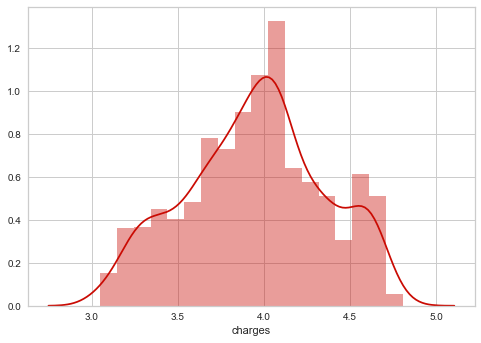

In [13]:
sns.distplot(np.log10(dataset['charges']), kde = True, color = 'r' )

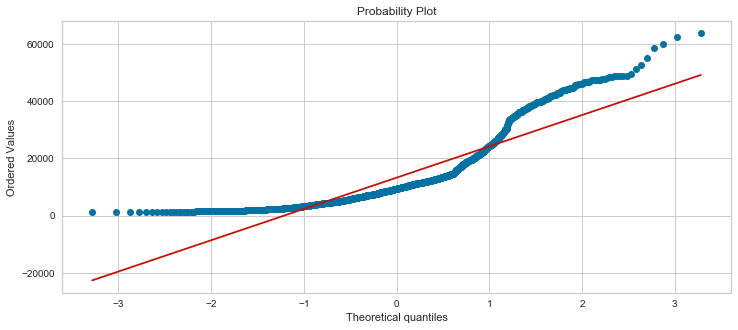

In [14]:
plt.figure(figsize=(12,5));
stats.probplot(dataset.charges, dist="norm", plot=pylab) ;

# From the above Probability plot we can say that charges are approximately normally distributed.

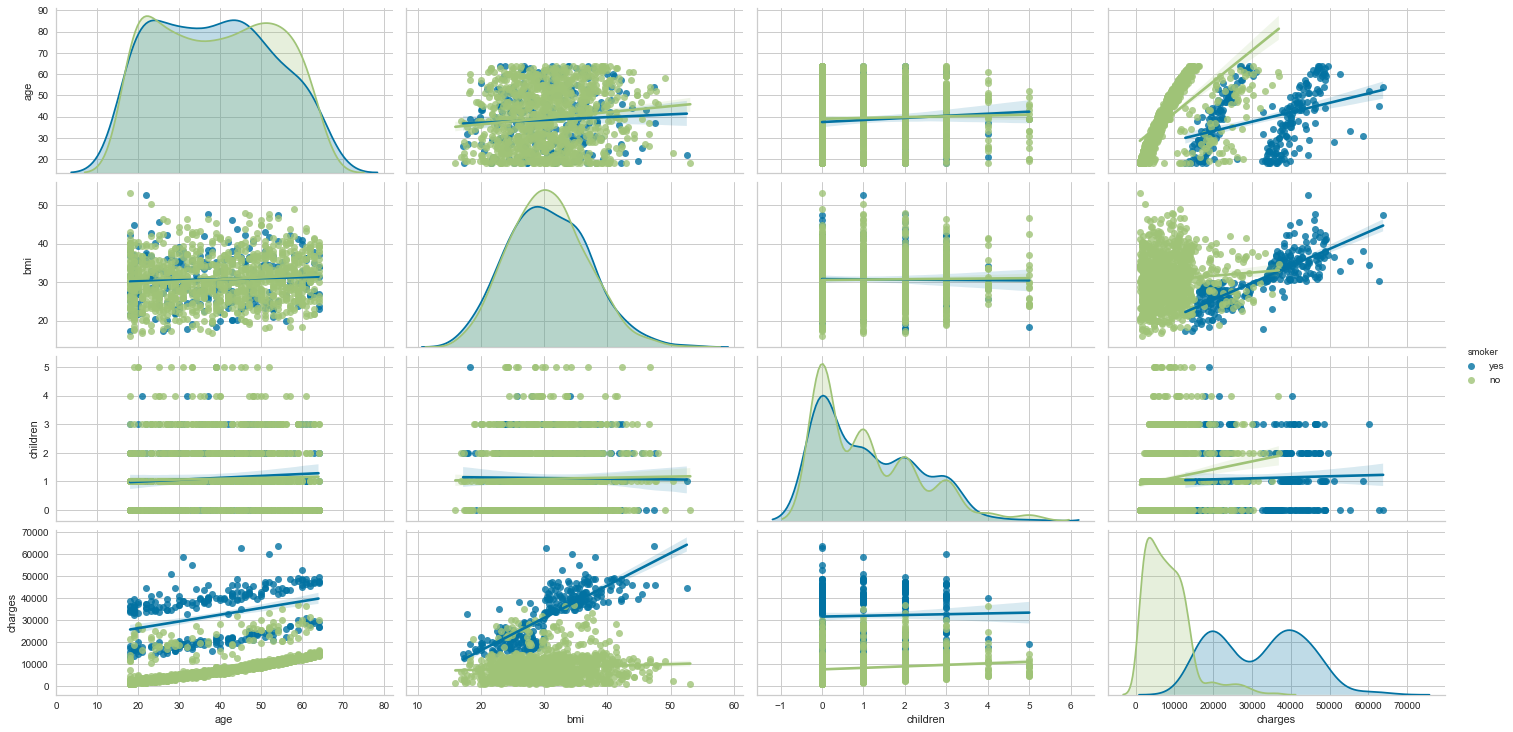

In [15]:
sns.pairplot(dataset,kind="reg",hue="smoker",aspect=2);

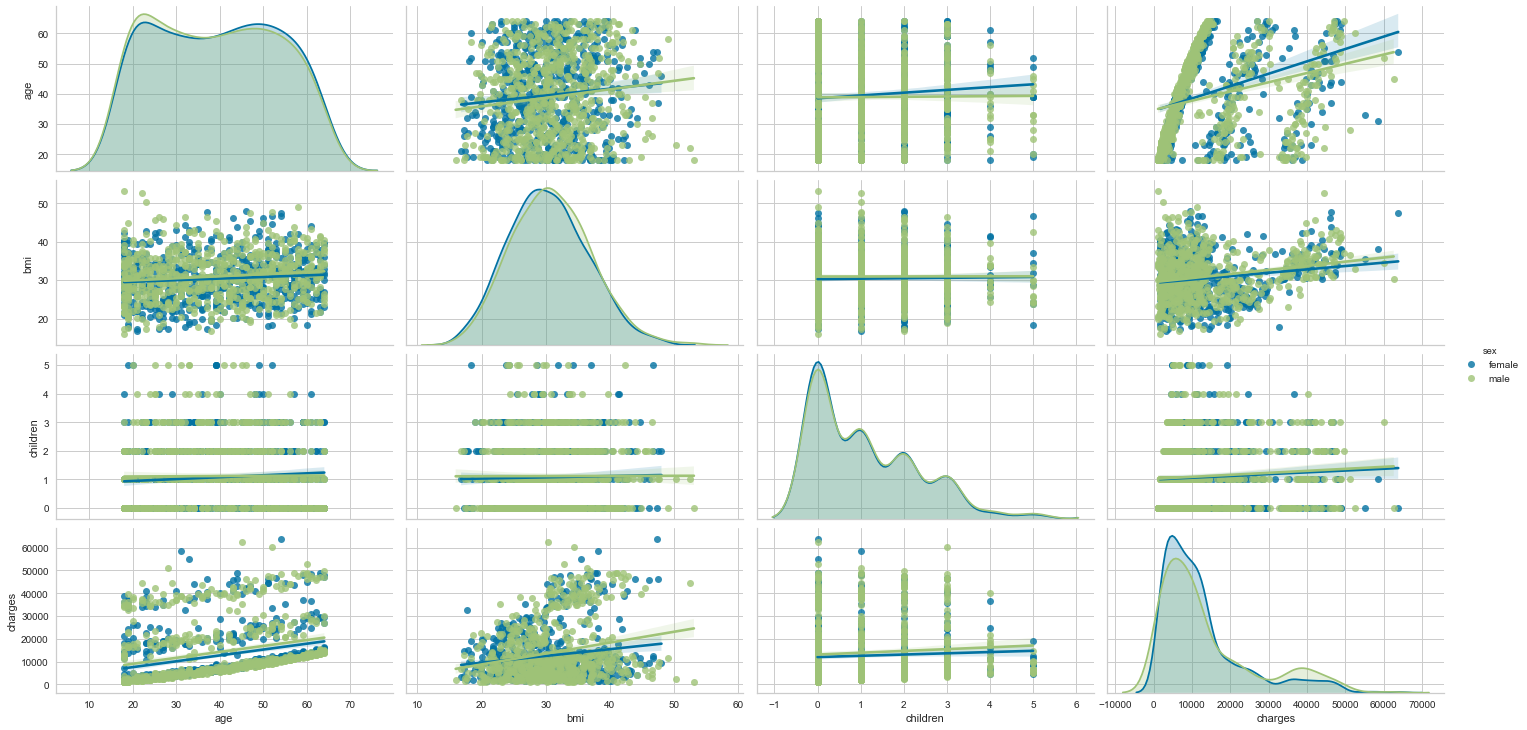

In [16]:
sns.pairplot(dataset,kind="reg",hue="sex",aspect=2);

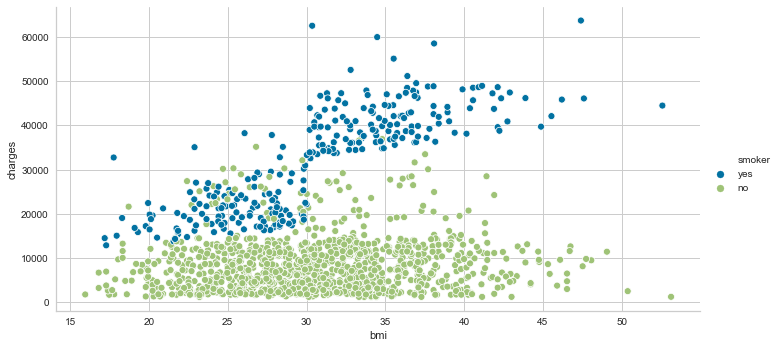

In [17]:
sns.relplot(x="bmi",y="charges",hue="smoker",data=dataset,kind="scatter",aspect=2);

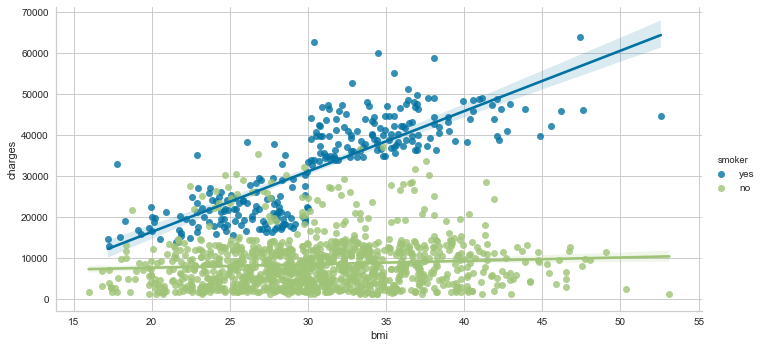

In [18]:
sns.lmplot(x="bmi", y="charges", hue="smoker", data=dataset,aspect=2);


# Smoking has the highest impact on medical costs, even though the costs are growing with age, bmi and children. Also people who have children generally smoke less.

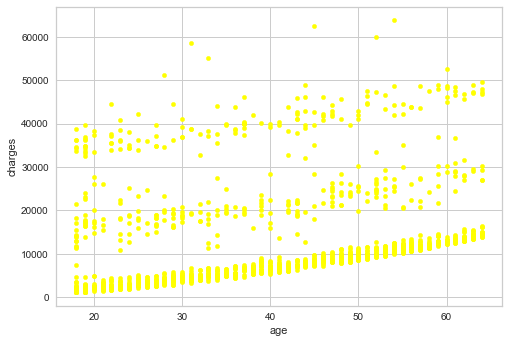

In [19]:
dataset.plot(kind='scatter',x='age',y='charges',color='yellow')

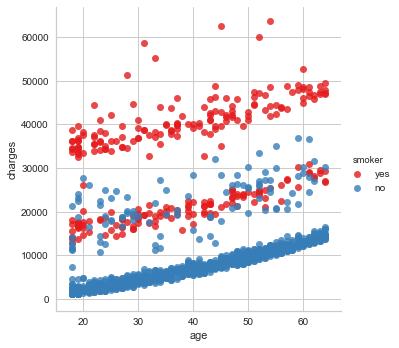

In [20]:
sns.lmplot(data=dataset, x="age",y="charges", fit_reg=False,hue="smoker",palette='Set1')

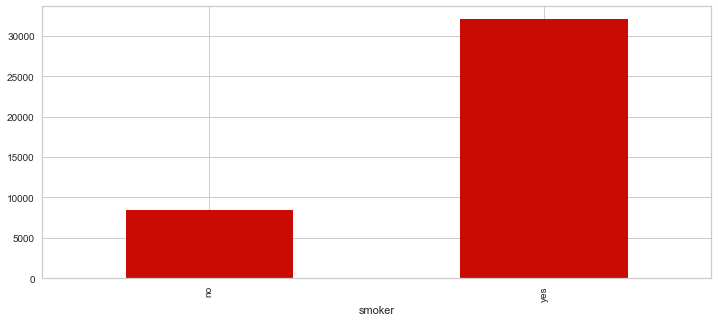

In [21]:
plt.figure(figsize=(12,5));
dataset.groupby("smoker")["charges"].mean().plot.bar(color="r");

# from the above graph we can say that charges for smokers are greater than non-smoker.

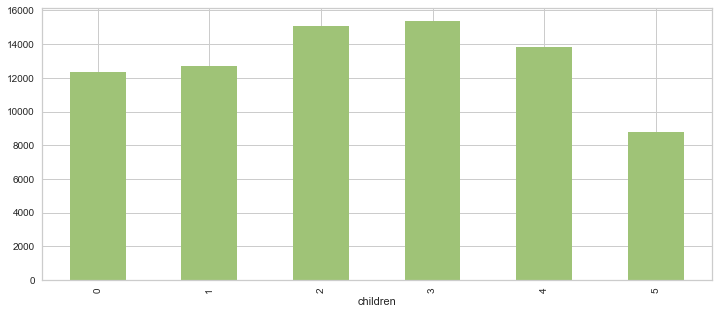

In [22]:
plt.figure(figsize=(12,5));
dataset.groupby("children")["charges"].mean().plot.bar(color="g");

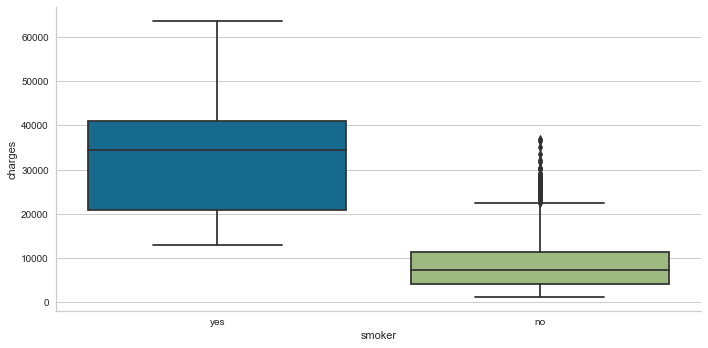

In [23]:
sns.catplot(x="smoker",y="charges",data=dataset,kind="box",aspect=2);

# From the above boxplot we can say that the mean value of charges for non smoker are less than mean value of charges of smoker.

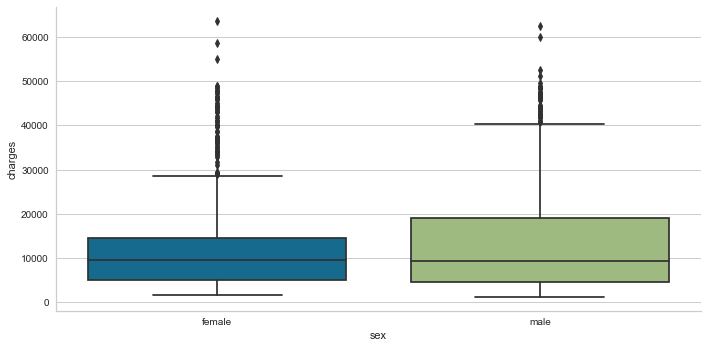

In [24]:
sns.catplot(x="sex",y="charges",data=dataset,kind="box",aspect=2);

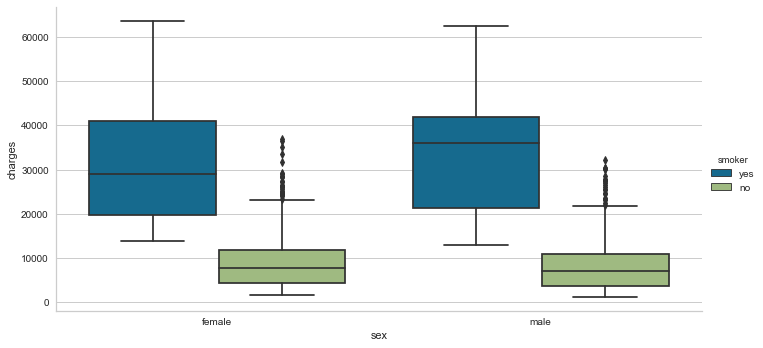

In [25]:
sns.catplot(x="sex",y="charges",hue="smoker",data=dataset,kind="box",aspect=2);

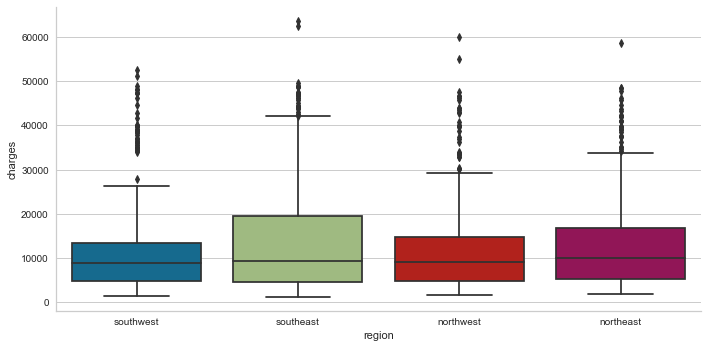

In [26]:
sns.catplot(x="region",y="charges",data=dataset,kind="box",aspect=2);

# We can see that southeast region has the highest mean charges followed by northeast while mean charges for the rest are not much of a difference from each other.

# Data pre-processing 

In [27]:
from sklearn.preprocessing import LabelEncoder
label=LabelEncoder()
label.fit(dataset['sex'])
dataset['sex']=label.transform(dataset['sex'])
label.fit(dataset['smoker'])
dataset['smoker']=label.transform(dataset['smoker'])
label.fit(dataset['region'])
dataset['region']=label.transform(dataset['region'])

In [28]:
dataset.dtypes

age           int64
sex           int32
bmi         float64
children      int64
smoker        int32
region        int32
charges     float64
dtype: object

In [29]:
labels=["too_weak","normal","heavy","too_heavy"]
ranges=[0,18.5,24.9,29.9,np.inf]
dataset["bmi"]=pd.cut(dataset["bmi"],bins=ranges,labels=labels)

In [30]:
dataset_new=dataset.copy()
dataset_new=pd.get_dummies(data=dataset,columns=["sex","smoker"],drop_first=True)

In [31]:
dataset_new=pd.get_dummies(data=dataset_new,columns=["region","bmi"])

In [32]:
dataset_new.head()

,age,children,charges,sex_1,smoker_1,region_0,region_1,region_2,region_3,bmi_too_weak,bmi_normal,bmi_heavy,bmi_too_heavy
0,19,0,16884.92400,0,1,0,0,0,1,0,0,1,0
1,18,1,1725.55230,1,0,0,0,1,0,0,0,0,1
2,28,3,4449.46200,1,0,0,0,1,0,0,0,0,1
3,33,0,21984.47061,1,0,0,1,0,0,0,1,0,0
4,32,0,3866.85520,1,0,0,1,0,0,0,0,1,0


In [33]:
dataset_new.charges=log(dataset_new.charges)

sc=StandardScaler()
dataset_scaled=pd.DataFrame(sc.fit_transform(dataset_new),columns=dataset_new.columns,index=dataset_new.index)

dataset_scaled.head()

,age,children,charges,sex_1,smoker_1,region_0,region_1,region_2,region_3,bmi_too_weak,bmi_normal,bmi_heavy,bmi_too_heavy
0,-1.438764,-0.908614,0.691394,-1.010519,1.970587,-0.565267,-0.566418,-0.611324,1.765481,-0.126275,-0.444805,1.587782,-1.072905
1,-1.509965,-0.078767,-1.790020,0.989591,-0.507463,-0.565267,-0.566418,1.635795,-0.566418,-0.126275,-0.444805,-0.629809,0.932049
2,-0.797954,1.580926,-0.759500,0.989591,-0.507463,-0.565267,-0.566418,1.635795,-0.566418,-0.126275,-0.444805,-0.629809,0.932049
3,-0.441948,-0.908614,0.978513,0.989591,-0.507463,-0.565267,1.765481,-0.611324,-0.566418,-0.126275,2.248177,-0.629809,-1.072905
4,-0.513149,-0.908614,-0.912181,0.989591,-0.507463,-0.565267,1.765481,-0.611324,-0.566418,-0.126275,-0.444805,1.587782,-1.072905


In [34]:
X=dataset_scaled.drop("charges",axis=1)
y=dataset_scaled["charges"]

# Correlation Matrix

In [35]:
my_rho = np.corrcoef(X)
my_rho

array([[ 1.        , -0.26688674, -0.43855885, ..., -0.05654804,
         0.79752419,  0.39640286],
       [-0.26688674,  1.        ,  0.84502394, ...,  0.7558413 ,
        -0.24347628, -0.62209606],
       [-0.43855885,  0.84502394,  1.        , ...,  0.51607012,
        -0.39968536, -0.64811227],
       ...,
       [-0.05654804,  0.7558413 ,  0.51607012, ...,  1.        ,
        -0.04562264, -0.36193997],
       [ 0.79752419, -0.24347628, -0.39968536, ..., -0.04562264,
         1.        ,  0.14638842],
       [ 0.39640286, -0.62209606, -0.64811227, ..., -0.36193997,
         0.14638842,  1.        ]])

# Checking VIF

In [36]:

from statsmodels.stats.outliers_influence import variance_inflation_factor 

# VIF dataframe 
vif_dataset = pd.DataFrame() 
vif_dataset["feature"] = X.columns 
  
# calculating VIF for each feature 
vif_dataset["VIF"] = [variance_inflation_factor(X.values, i) 
                          for i in range(len(X.columns))] 
  
print(vif_dataset)

          feature       VIF
0             age  1.016444
1        children  1.004161
2           sex_1  1.009060
3        smoker_1  1.013013
4        region_0       inf
5        region_1       inf
6        region_2       inf
7        region_3       inf
8    bmi_too_weak       inf
9      bmi_normal       inf
10      bmi_heavy       inf
11  bmi_too_heavy       inf


# Train Test Split  & Multiple Linear Regression Model

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [38]:
lin_regression= LinearRegression()
lin_regression.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [39]:
lin_regression.coef_

array([ 0.52848429,  0.13152188, -0.02664332,  0.6873468 ,  0.03764728,
        0.00922889, -0.02649753, -0.01933951, -0.03606923, -0.04930385,
       -0.01072092,  0.05538869])

In [40]:
y_test_pred=lin_regression.predict(X_test)
y_test_pred

array([ 0.13970299, -0.14442269,  1.8682293 ,  0.43583705, -0.28840763,
       -0.75760346, -1.19737353,  0.44026841, -0.04890482, -0.36559535,
       -0.37688499,  0.15867033, -0.28049224, -0.88936734,  0.72491405,
        0.18674938,  0.1543822 , -0.70566403, -0.34616376,  0.66270029,
        1.73728929,  0.519269  ,  0.21682903,  1.44971389, -1.11274657,
       -0.47989177, -1.08750716, -0.05471132, -0.85562502,  0.05206362,
       -0.1084738 ,  2.09193823,  0.40684713,  0.14344615,  0.62267855,
       -0.745829  ,  0.00862841,  0.9398935 ,  1.62048918, -1.12026914,
       -0.62905648, -0.98417201,  1.24281938,  2.24451641,  0.4933077 ,
       -0.79773586,  0.18674938, -0.30479188, -0.74568577,  0.12286468,
       -0.87440357, -0.89867672,  1.5576413 ,  2.20990878,  0.29517656,
       -0.73954958, -0.96223173, -0.11290517,  0.08834478,  0.26352516,
       -1.34601382,  2.50417422,  0.64457332,  0.17358854,  0.4495965 ,
        0.15536384,  0.47764685,  1.3376842 , -1.12262592,  0.08

# Assumption of Homoscedasticity

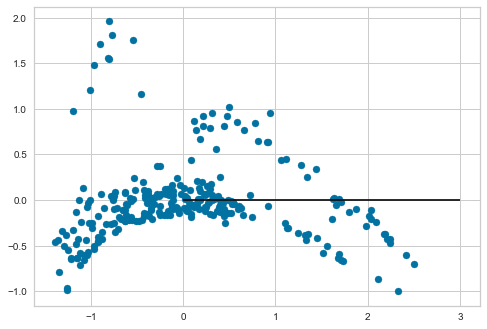

In [41]:
resid= y_test-y_test_pred
resid = pd.Series(resid)
plt.scatter(y_test_pred,resid)
plt.hlines(0,0,3)

# <font color='blue'>OLS Regression</font>  

In [42]:
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.764
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              342.3
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                   1.48e-323
Time:                        17:04:47   Log-Likelihood:                         -747.58
No. Observations:                1070   AIC:                                      1515.
Df Residuals:                    1060   BIC:                                      1565.
Df Model:                          10                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
age               0.5285      0.015     35.001      0.000       0.499       0.558
children          0.1315      0.015      8.785      0.000       0.102       0.161
sex_1            -0.0267      0.015     -1.784      0.075      -0.056       0.003
smoker_1          0.6874      0.015     45.611      0.000       0.658       0.717
region_0          0.0376      0.012      3.255      0.001       0.015       0.060
region_1          0.0092      0.011      0.803      0.422      -0.013       0.032
region_2         -0.0265      0.011     -2.348      0.019      -0.049      -0.004
region_3         -0.0193      0.011     -1.728      0.084      -0.041       0.003
bmi_too_weak     -0.0361      0.015     -2.470      0.014      -0.065      -0.007
bmi_normal       -0.0493      0.012     -4.209      0.000      -0.072      -0.026
bmi_heavy        -0.0107      0.010     -1.062      0.289      -0.031       0.009
bmi_too_heavy     0.0554      0.009      6.082      0.000       0.038       0.073
==============================================================================
Omnibus:                      371.581   Durbin-Watson:                   1.997
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1331.758
Skew:                           1.669   Prob(JB):                    6.49e-290
Kurtosis:                       7.328   Cond. No.                     5.41e+15
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is  7e-29. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [43]:
import statsmodels.api as sm


def forward_regression(X, y,
                       threshold_in,
                       verbose=True):
    initial_list = []
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        if not changed:
            break

    return included

In [44]:
forward_regression(X_train, y_train, 0.01)

Add  smoker_1                       with p-value 2.08232e-133
Add  age                            with p-value 4.69652e-179
Add  children                       with p-value 1.79057e-16
Add  bmi_too_heavy                  with p-value 1.56957e-07
Add  region_0                       with p-value 0.00262353
Add  bmi_heavy                      with p-value 0.00860969


['smoker_1', 'age', 'children', 'bmi_too_heavy', 'region_0', 'bmi_heavy']

In [45]:
X=dataset_scaled.drop(["charges","region_1","region_2","region_3","bmi_too_weak","bmi_normal"],axis=1)
y=dataset_scaled["charges"] 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=0)
lm=sm.OLS(y_train,X_train)
model=lm.fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                charges   R-squared (uncentered):                   0.762
Model:                            OLS   Adj. R-squared (uncentered):              0.761
Method:                 Least Squares   F-statistic:                              487.1
Date:                Tue, 30 Mar 2021   Prob (F-statistic):                        0.00
Time:                        17:07:02   Log-Likelihood:                         -750.34
No. Observations:                1070   AIC:                                      1515.
Df Residuals:                    1063   BIC:                                      1550.
Df Model:                           7                                                  
Covariance Type:            nonrobust                                                  
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
age               0.5299      0.015     35.118      0.000       0.500       0.560
children          0.1309      0.015      8.756      0.000       0.102       0.160
sex_1            -0.0274      0.015     -1.826      0.068      -0.057       0.002
smoker_1          0.6861      0.015     45.652      0.000       0.657       0.716
region_0          0.0488      0.015      3.190      0.001       0.019       0.079
bmi_heavy         0.0541      0.020      2.653      0.008       0.014       0.094
bmi_too_heavy     0.1223      0.021      5.938      0.000       0.082       0.163
==============================================================================
Omnibus:                      371.852   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1341.801
Skew:                           1.667   Prob(JB):                    4.28e-292
Kurtosis:                       7.357   Cond. No.                         2.32
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [46]:
model.params

age              0.529938
children         0.130907
sex_1           -0.027374
smoker_1         0.686052
region_0         0.048779
bmi_heavy        0.054108
bmi_too_heavy    0.122273
dtype: float64

In [47]:
model=LinearRegression()
lin_mo=model.fit(X_train,y_train)
y_pred=lin_mo.predict(X_test)

In [48]:
lin_mo.score(X_train,y_train)

0.7623242321830157

In [49]:
lin_mo.score(X_test,y_test)

0.7862524725338143

In [50]:
r2_score(y_test,y_pred)

0.7862524725338143

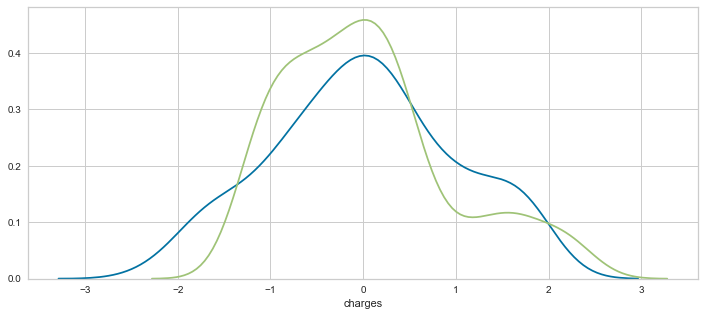

In [51]:
plt.figure(figsize=(12,5));
ax1=sns.distplot(y_test,hist=False)
sns.distplot(y_pred,ax=ax1,hist=False);

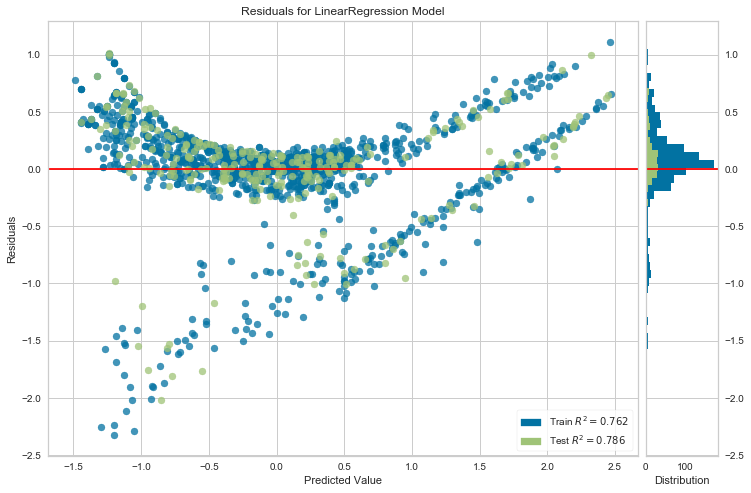

In [52]:
plt.figure(figsize=(12,8));
residuals_plot(model, X_train, y_train, X_test, y_test,line_color="red");

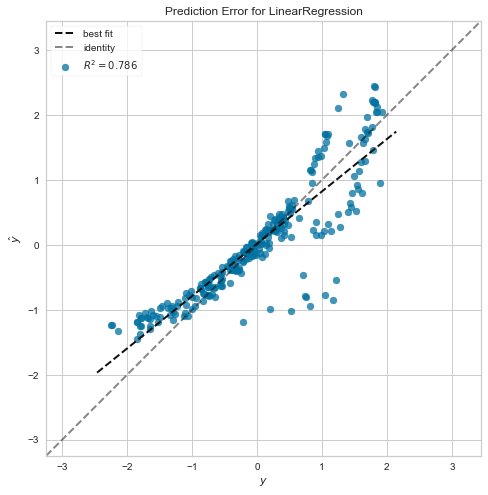

In [53]:
plt.figure(figsize=(12,8));
prediction_error(model, X_train, y_train, X_test, y_test);

In [54]:
model.coef_

array([ 0.5299574 ,  0.13094091, -0.02730271,  0.68604848,  0.04884348,
        0.05411512,  0.12228355])

In [55]:
model.intercept_

0.0028103297716454085

# So here the r_square value is 0.78 hence the model explained 78% of the fitted data in the regression model.